In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["font.sans-serif"]=['SimHei']
plt.rcParams["axes.unicode_minus"]=False

In [2]:
#读取数据
ratings = pd.read_csv('./ml-latest-small/ratings.csv',sep = ',')

In [3]:
#去除timestamp列
ratings = ratings.iloc[:,0:3]

In [4]:
ratings.isnull().any()

userId     False
movieId    False
rating     False
dtype: bool

In [5]:
ratings

,userId,movieId,rating
0,1,1,4.0
1,1,3,4.0
2,1,6,4.0
3,1,47,5.0
4,1,50,5.0
...,...,...,...
100831,610,166534,4.0
100832,610,168248,5.0
100833,610,168250,5.0
100834,610,168252,5.0


In [6]:
movies = pd.read_csv('./ml-latest-small/movies.csv',sep = ',')
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [7]:
movies.isnull().any()

movieId    False
title      False
genres     False
dtype: bool

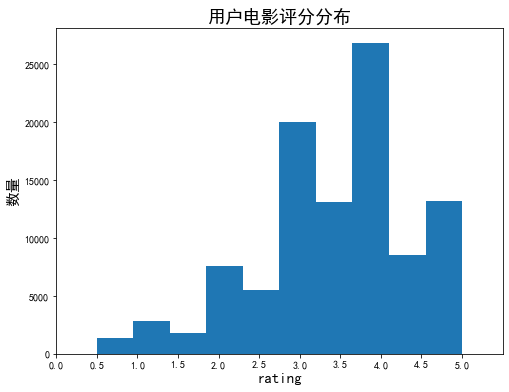

In [8]:
#用户电影评分的探索性分析
plt.figure(figsize=(8,6))
X = ratings.loc[:,'rating']
plt.hist(X)
plt.xlim(0,5.5)
plt.xticks([0,0.5,1,1.5,2,2.5,3,3.5,4,4.5,5])
plt.ylabel('数量',fontsize=15)
plt.xlabel('rating',fontsize=15)
plt.title('用户电影评分分布',fontsize=18)
plt.show()

In [9]:
#拼接电影数据
data = pd.merge(ratings,movies.loc[:,['movieId','title']],on='movieId')
data

,userId,movieId,rating,title
0,1,1,4.0,Toy Story (1995)
1,5,1,4.0,Toy Story (1995)
2,7,1,4.5,Toy Story (1995)
3,15,1,2.5,Toy Story (1995)
4,17,1,4.5,Toy Story (1995)
...,...,...,...,...
100831,610,160341,2.5,Bloodmoon (1997)
100832,610,160527,4.5,Sympathy for the Underdog (1971)
100833,610,160836,3.0,Hazard (2005)
100834,610,163937,3.5,Blair Witch (2016)


In [10]:
#data[data['movieId']==1]['title'].unique()[0]

In [11]:
user = ratings['userId'].unique()
movie = ratings['movieId'].unique()

In [12]:
#构建user，movie矩阵
df = pd.DataFrame(columns = movie,index = user)

In [13]:
#构建用户、电影的评分 分组
temp = ratings.groupby(['userId','movieId'])['rating'].sum()

In [14]:
temp

userId  movieId
1       1          4.0
        3          4.0
        6          4.0
        47         5.0
        50         5.0
                  ... 
610     166534     4.0
        168248     5.0
        168250     5.0
        168252     5.0
        170875     3.0
Name: rating, Length: 100836, dtype: float64

In [15]:
#ratings[ratings['userId']==1]['movieId']

In [16]:
#构造user,movie的评分矩阵
for u in np.unique(ratings['userId']):
    for m in ratings[ratings['userId']==u]['movieId']:
        df.loc[u,m] = float(temp[(u,m)])
    

In [17]:
df

,1,3,6,47,50,70,101,110,151,157,...,147662,148166,149011,152372,158721,160341,160527,160836,163937,163981
1,4.0,4.0,4.0,5.0,5.0,3.0,5.0,4.0,5.0,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,4.0,NaN,NaN,NaN,4.0,NaN,NaN,4.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
606,2.5,NaN,NaN,3.0,4.5,4.0,NaN,3.5,NaN,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
607,4.0,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
608,2.5,2.0,NaN,4.5,4.5,3.0,NaN,4.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
609,3.0,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
#df.to_excel('user,movie的评分矩阵.xlsx')

In [18]:
# 复制评分矩阵副本
df_ = df

In [19]:
#转置
df_T = df_.T
df_T.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9724 entries, 1 to 163981
Columns: 610 entries, 1 to 610
dtypes: object(610)
memory usage: 45.6+ MB


In [20]:
# 各个用户之间的相似度
df_ = df_.apply(lambda x:x.astype(float))
user_similar = df_.T.corr()
user_similar

,1,2,3,4,5,6,7,8,9,10,...,601,602,603,604,605,606,607,608,609,610
1,1.000000,NaN,0.079819,0.207983,0.268749,-0.291636,-0.118773,0.469668,0.918559,-0.037987,...,9.157371e-02,-1.597727e-16,-0.061503,-0.407556,-0.164871,0.066378,0.174557,0.268070,-0.175412,-0.032086
2,NaN,1.000000,NaN,NaN,NaN,NaN,-0.991241,NaN,NaN,0.037796,...,-3.873468e-01,NaN,-1.000000,NaN,NaN,0.583333,NaN,-0.125000,NaN,0.623288
3,0.079819,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.433200,NaN,NaN,-0.791334,-0.333333,-0.395092,NaN,0.569562
4,0.207983,NaN,NaN,1.000000,-0.336525,0.148498,0.542861,0.117851,NaN,0.485794,...,-2.221127e-01,3.966413e-01,0.090090,-0.080296,0.400124,0.144603,0.116518,-0.170501,-0.277350,-0.043786
5,0.268749,NaN,NaN,-0.336525,1.000000,0.043166,0.158114,0.028347,NaN,-0.777714,...,-1.812987e-16,1.533034e-01,0.234743,0.067791,-0.364156,0.244321,0.231080,-0.020546,0.384111,0.040582
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
606,0.066378,0.583333,-0.791334,0.144603,0.244321,-0.049192,0.137771,0.253582,0.572700,-0.382955,...,2.904896e-01,1.406134e-01,0.318473,0.682949,0.167062,1.000000,0.114191,0.240842,0.533002,0.389185
607,0.174557,NaN,-0.333333,0.116518,0.231080,0.255639,0.402792,0.251280,NaN,-0.241121,...,6.982411e-01,2.172105e-01,0.192787,0.035806,-0.299641,0.114191,1.000000,0.200814,0.190117,0.106605
608,0.268070,-0.125000,-0.395092,-0.170501,-0.020546,0.125428,0.008081,0.434423,0.336625,-0.571043,...,4.739665e-01,2.976461e-01,0.086423,0.053986,-0.075673,0.240842,0.200814,1.000000,0.488929,0.147606
609,-0.175412,NaN,NaN,-0.277350,0.384111,0.193649,0.420288,0.141860,NaN,NaN,...,1.000000e+00,1.885115e-01,0.343303,0.641624,-0.550000,0.533002,0.190117,0.488929,1.000000,-0.521773


In [21]:
#df_self = user_similar.loc[i].drop(i)
#df_self

In [22]:
#寻找每个用户最相似的两个用户
top_users = {}
for i in user_similar.index:
    df_self = user_similar.loc[i].drop(i)  # df_self保存删除自己的用户数据
    #print(df_self)
    df_self_sorted = df_self.sort_values(ascending=False)
    top2 = list(df_self_sorted.index[:2])
    top_users[i] = top2
    
#top_users

In [23]:
#查找相似用户函数
def find_users(user):
    top_users = {}
    df_self = user_similar.loc[user].drop(user)  # df_self保存已经删除自己的用户数据
    #print(df_self)
    df_self_sorted = df_self.sort_values(ascending=False)
    top2 = list(df_self_sorted.index[:2])
    top_users[user] = top2

    return top_users

In [24]:
#top_users[1]

In [25]:
#top_users.items()

In [26]:
results = {}
for user,top2 in top_users.items():
    result = set()
    for top2_user in top2:               #遍历每个用户对应的两个最相似用户
        result = result.union(set(df_.loc[top2_user].dropna().index))   #
    #除去该用户已经看过的电影    
    result -= set(df_.loc[user].dropna().index)
    results[user] = result #按照用户保存结果到results
    
#display(results)

In [27]:
#推荐函数
def recommend(top_users):
    results = {}
    for user,top1 in top_users.items():
        result = set()
        for top1_user in top1:               #遍历每个用户对应的两个最相似用户
            result = result.union(set(df_.loc[top1_user].dropna().index))   #
        #除去该用户已经看过的电影    
        result -= set(df_.loc[user].dropna().index)
        #新建dataframe保存相似用户的电影评价信息
        df_temp = pd.DataFrame(columns=['userId','movieId','rating','title'])
        for i in result:
            df_temp = pd.concat( [ df_temp,data[ (data['movieId']==i) & (data['userId']==top1_user) ] ] )
        #将上述处理后的电影数据信息按照‘rating’降序排序，并且将评分最高的作为推荐电影
        recommend_ = df_temp.sort_values(by='rating',ascending=False) 
        dict_ = {}
        for i in range(5):
            dict_[recommend_.iloc[i,1]]=recommend_.iloc[i,3]
    
        results[user] = dict_
    #return results
    print(f'对于用户：{list(results.keys())}；相似用户为：{top1}；\n推荐五部电影为：')
    for u,m in results.items():
        for movieid,title in m.items():
            print(f"推荐电影：编号：{movieid}；标题:{title}")
    print("========================================================================")


In [208]:
def recommend_(top_users):    
    results = {}
    for user,top1 in top_users.items():
        result = set()
        for top1_user in top1:               #遍历每个用户对应的两个最相似用户
            result = result.union(set(df_.loc[top1_user].dropna().index))   #
        #除去该用户已经看过的电影    
        result -= set(df_.loc[user].dropna().index)
        #新建dataframe保存相似用户的电影评价信息
        df_temp = pd.DataFrame(columns=['userId','movieId','rating','title'])
        for i in result:
            df_temp = pd.concat( [ df_temp,data[ (data['movieId']==i) & (data['userId']==top1_user) ] ] )
        #将上述处理后的电影数据信息按照‘rating’降序排序，并且将评分最高的作为推荐电影
        recommend_ = df_temp.sort_values(by='rating',ascending=False) 
        dict_ = {}
        for i in range(5):
            dict_[recommend_.iloc[i,1]]=recommend_.iloc[i,3]
    
        results[user] = dict_
    return results

In [29]:
users_ = find_users(12)
topmovie = recommend(users_)

对于用户：[12]；相似用户为：[212, 31]；
推荐五部电影为：
推荐电影：编号：1；标题:Toy Story (1995)
推荐电影：编号：648；标题:Mission: Impossible (1996)
推荐电影：编号：912；标题:Casablanca (1942)
推荐电影：编号：377；标题:Speed (1994)
推荐电影：编号：1391；标题:Mars Attacks! (1996)


In [ ]:
topmovie

In [30]:
#模型应用
input_user = '0'   #设置开始循环
while input_user.isdigit():
    input_user = input("输入用户ID(要求为数字，输入错误自动退出！):") 
    #判断输入是否为正确的用户编号
    if input_user.isdigit()==False:   
        break
    elif int(input_user)>943:
        break
    elif int(input_user)<0:
        break
    #调用查找相似用户函数    
    temp = find_users(int(input_user))
    #调用推荐函数
    recommend(temp)
    

输入用户ID(要求为数字，输入错误自动退出！): 12


对于用户：[12]；相似用户为：[212, 31]；
推荐五部电影为：
推荐电影：编号：1；标题:Toy Story (1995)
推荐电影：编号：648；标题:Mission: Impossible (1996)
推荐电影：编号：912；标题:Casablanca (1942)
推荐电影：编号：377；标题:Speed (1994)
推荐电影：编号：1391；标题:Mars Attacks! (1996)


输入用户ID(要求为数字，输入错误自动退出！): 23


对于用户：[23]；相似用户为：[475, 394]；
推荐五部电影为：
推荐电影：编号：110；标题:Braveheart (1995)
推荐电影：编号：553；标题:Tombstone (1993)
推荐电影：编号：457；标题:Fugitive, The (1993)
推荐电影：编号：356；标题:Forrest Gump (1994)
推荐电影：编号：225；标题:Disclosure (1994)


输入用户ID(要求为数字，输入错误自动退出！): 345


对于用户：[345]；相似用户为：[353, 56]；
推荐五部电影为：
推荐电影：编号：593；标题:Silence of the Lambs, The (1991)
推荐电影：编号：19；标题:Ace Ventura: When Nature Calls (1995)
推荐电影：编号：47；标题:Seven (a.k.a. Se7en) (1995)
推荐电影：编号：231；标题:Dumb & Dumber (Dumb and Dumber) (1994)
推荐电影：编号：364；标题:Lion King, The (1994)


输入用户ID(要求为数字，输入错误自动退出！): 87


对于用户：[87]；相似用户为：[434, 306]；
推荐五部电影为：
推荐电影：编号：60069；标题:WALL·E (2008)
推荐电影：编号：103372；标题:Heat, The (2013)
推荐电影：编号：45668；标题:Lake House, The (2006)
推荐电影：编号：69406；标题:Proposal, The (2009)
推荐电影：编号：134368；标题:Spy (2015)


输入用户ID(要求为数字，输入错误自动退出！): q
